In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.shape

(299, 13)

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [7]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [11]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

# **univariate analysis**

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

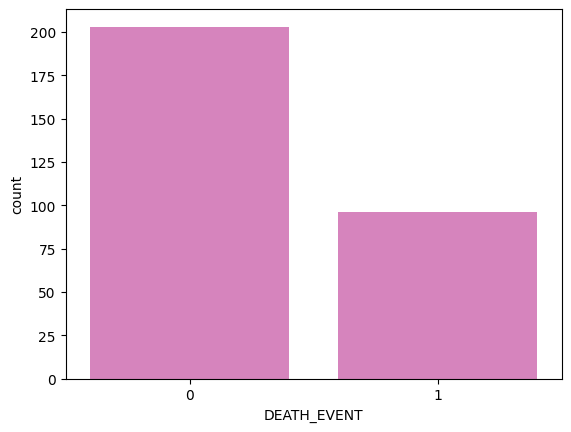

In [12]:
sns.countplot(x='DEATH_EVENT',data=df,color='#e377c2')

In [13]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# **Bivariate analysis**

<Axes: xlabel='age', ylabel='Count'>

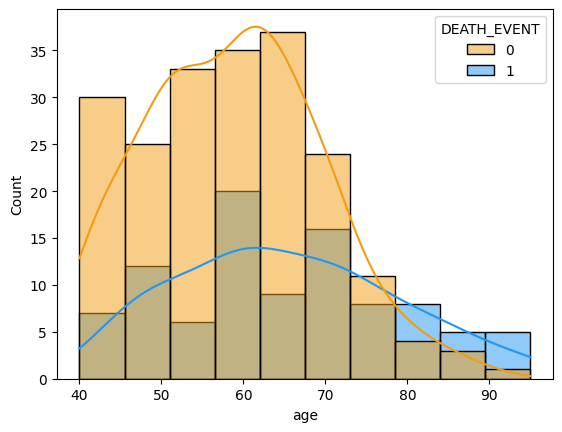

In [14]:
colors = ["#F39C12",  "#2196F3"]
sns.histplot(x='age',hue='DEATH_EVENT',kde=True,data=df,palette=colors)

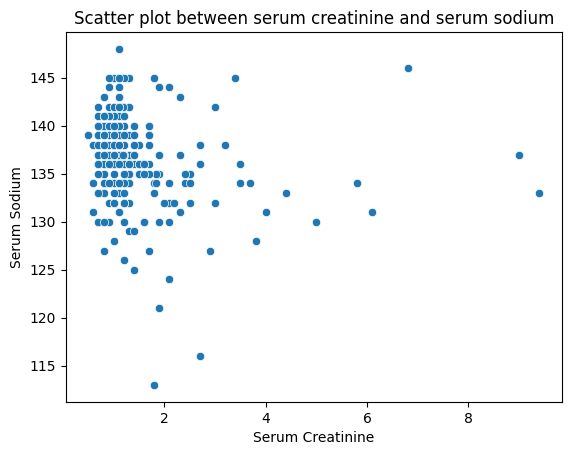

In [15]:
colors = ["#F39C12",  "#2196F3"]
sns.scatterplot(x='serum_creatinine', y='serum_sodium', data=df)
plt.title('Scatter plot between serum creatinine and serum sodium')
plt.xlabel('Serum Creatinine')
plt.ylabel('Serum Sodium')
plt.show()

# **Multivariate analysis**

<Axes: >

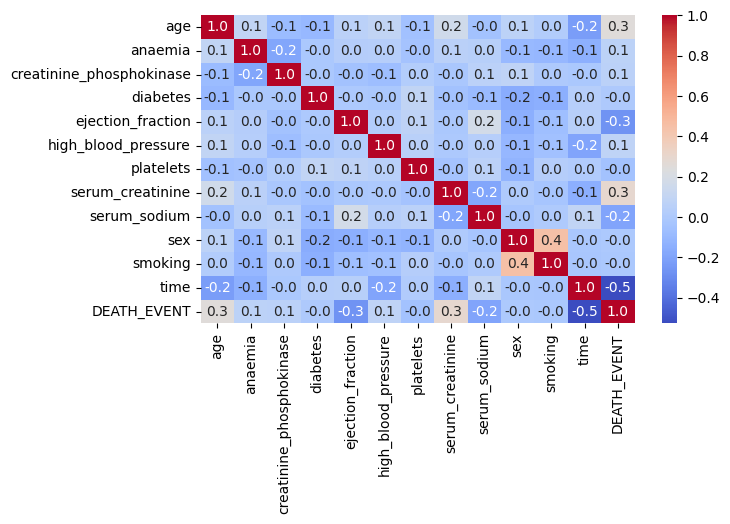

In [16]:
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.1f')

<Axes: xlabel='creatinine_phosphokinase', ylabel='platelets'>

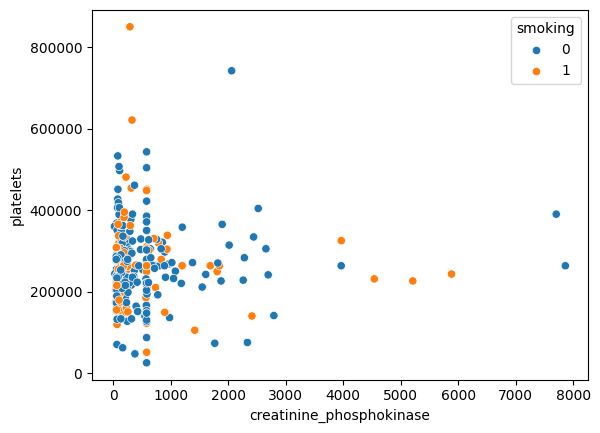

In [17]:
sns.scatterplot(data=df, x="creatinine_phosphokinase", y="platelets", hue="smoking")

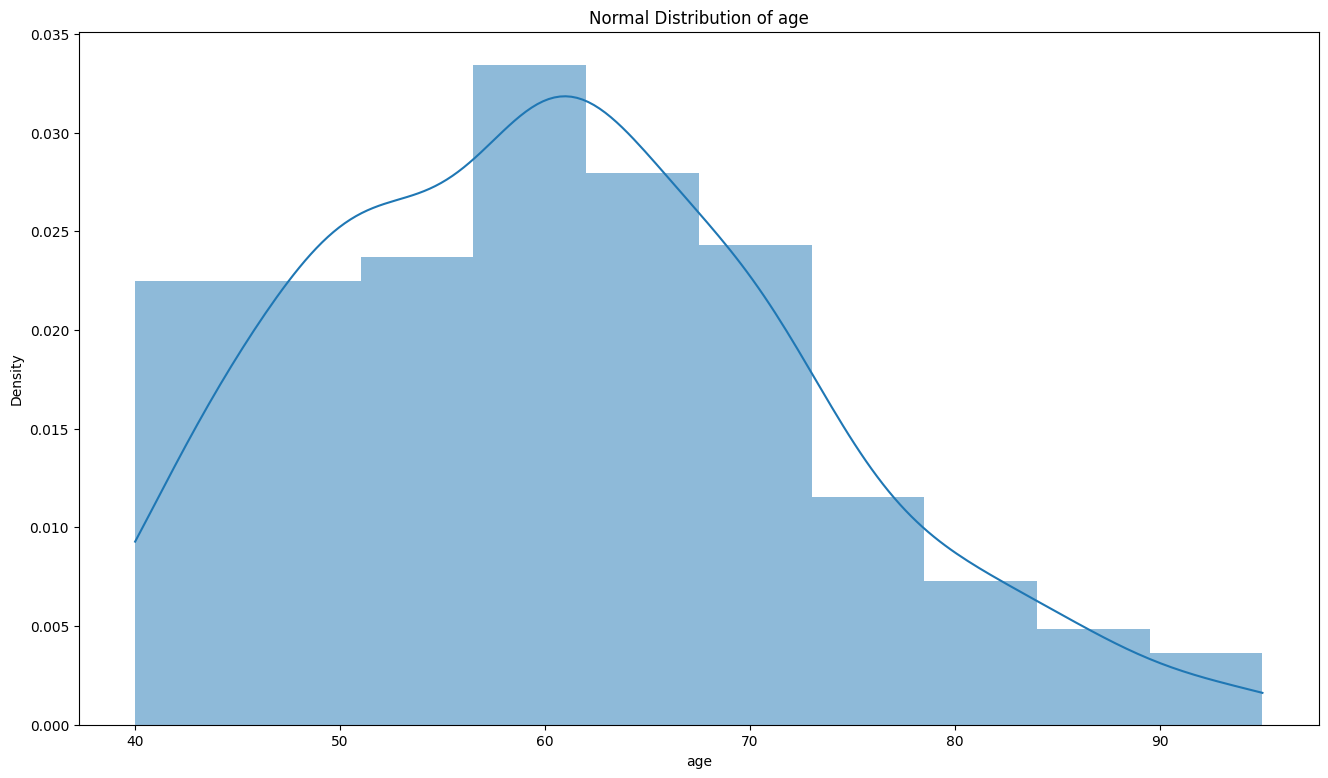

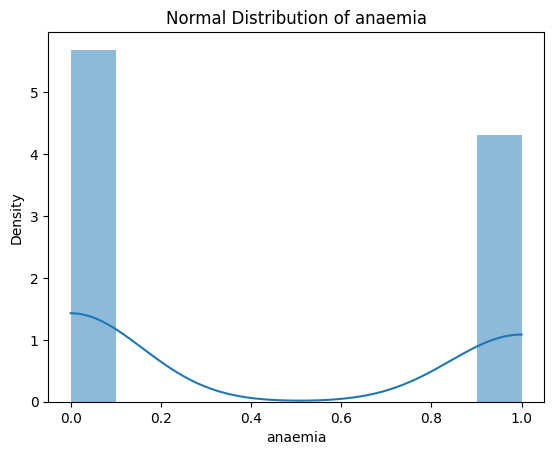

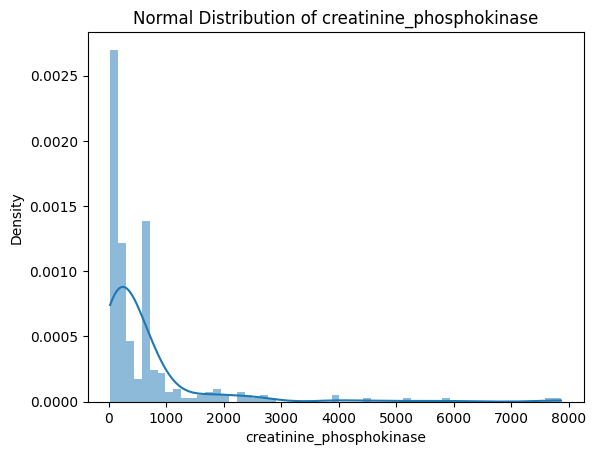

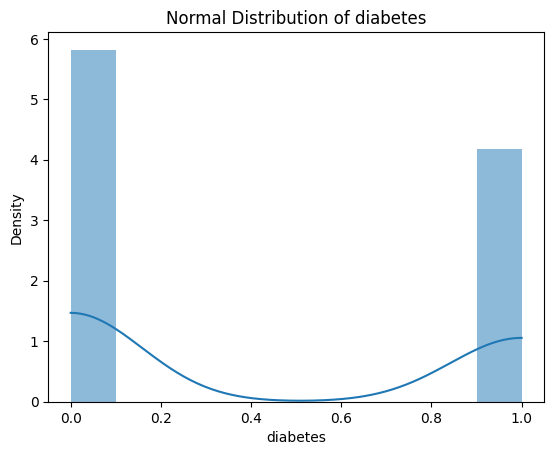

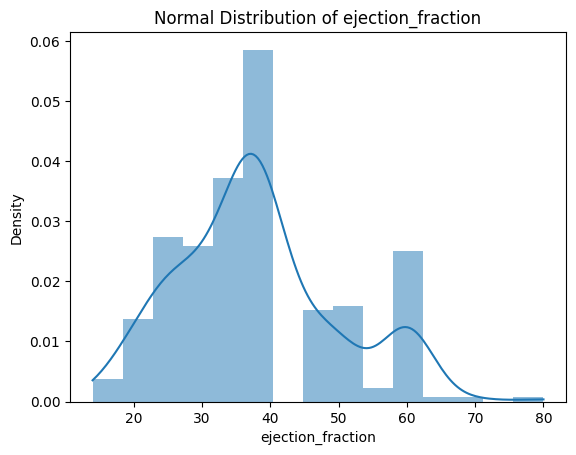

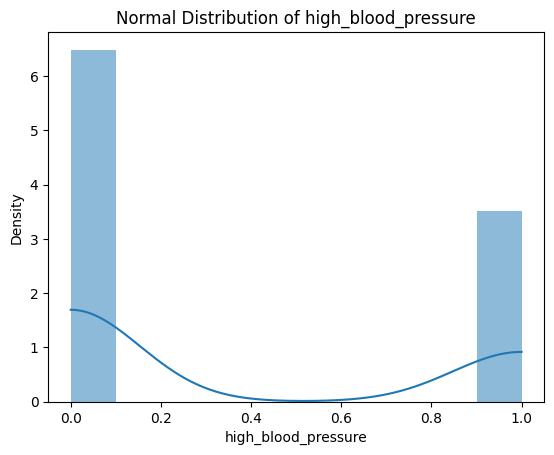

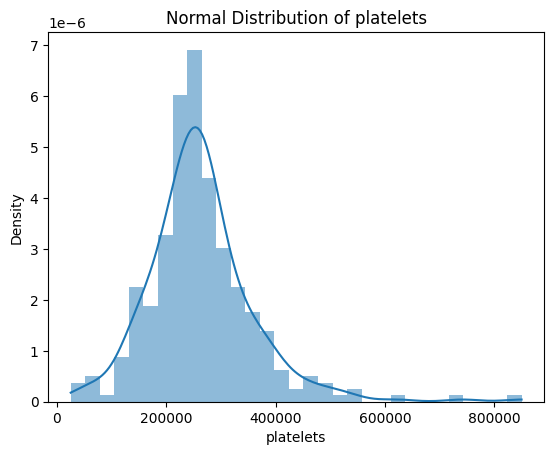

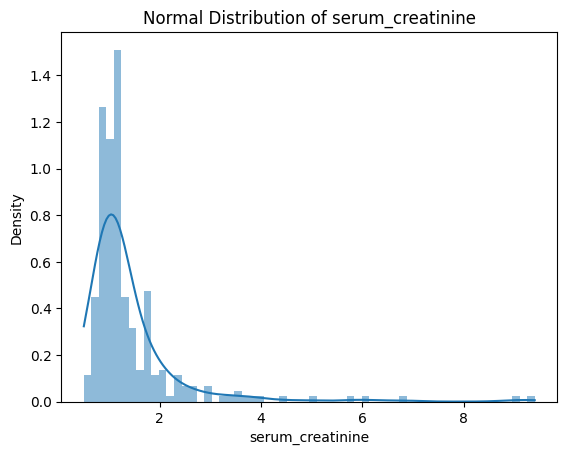

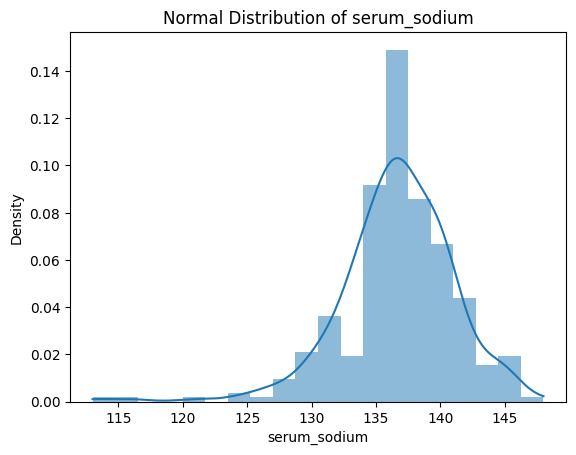

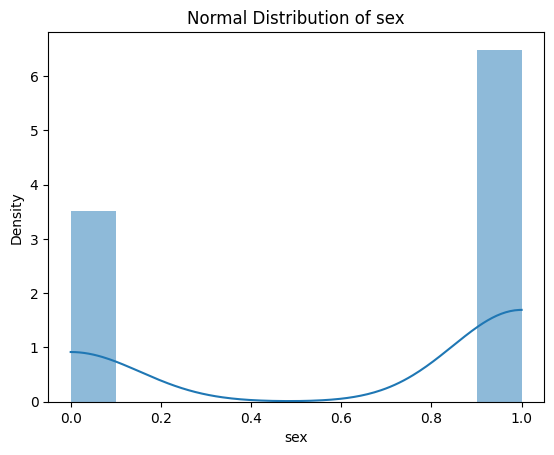

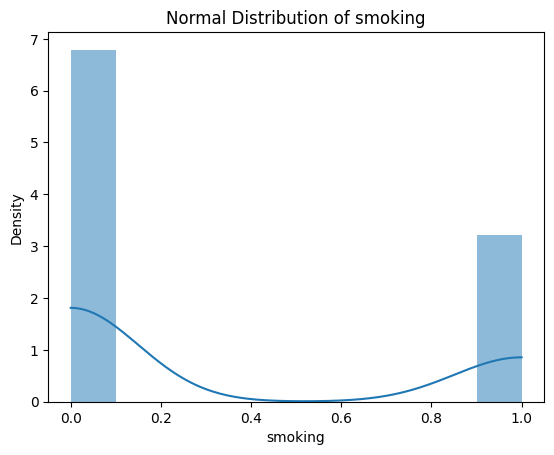

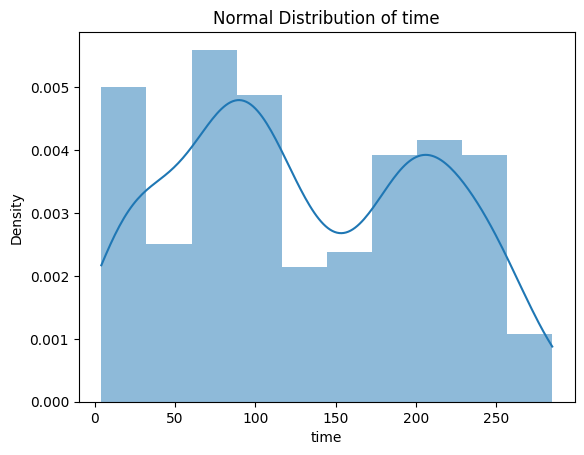

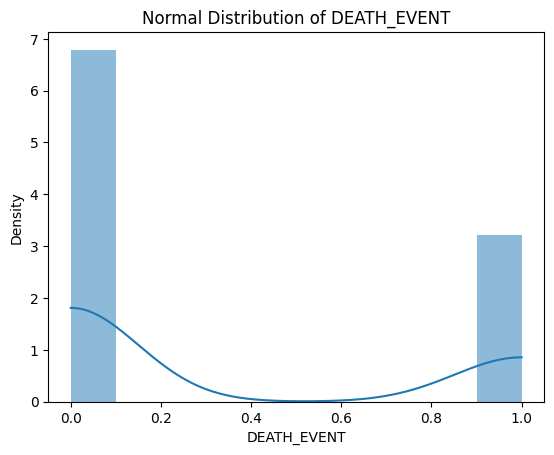

In [18]:

plt.figure(figsize=(16, 9))
for column in df.select_dtypes(include=['float64', 'int64']):
    sns.histplot(df[column], kde=True, stat="density", linewidth=0)
    plt.title(f'Normal Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


In [19]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# **outliers detection**

Text(0.5, 1.0, 'boxplot for creatinine_phosphokinase')

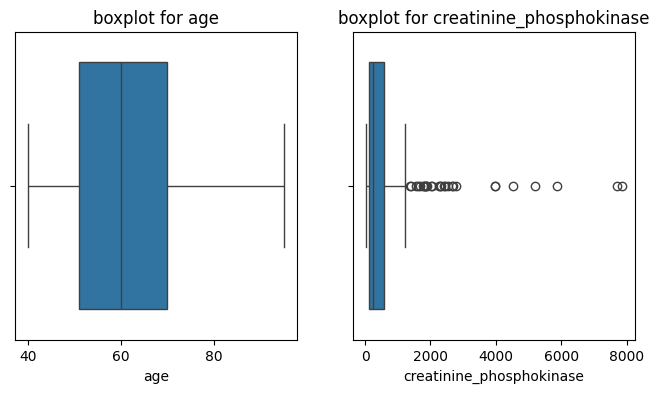

In [20]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
sns.boxplot(data = df,ax=axes[0],x='age')
axes[0].set_title("boxplot for age")
sns.boxplot(data = df,ax=axes[1],x='creatinine_phosphokinase')
axes[1].set_title("boxplot for creatinine_phosphokinase")

In [21]:
quant=df['creatinine_phosphokinase'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)

0.75    582.0
0.25    116.5
Name: creatinine_phosphokinase, dtype: float64
582.0
116.5
465.5
1280.25
-581.75


In [22]:
df['creatinine_phosphokinase']=np.where(df['creatinine_phosphokinase']>582.0,582.0,df['creatinine_phosphokinase'])
df['creatinine_phosphokinase']=np.where(df['creatinine_phosphokinase']<116.5,116.5,df['creatinine_phosphokinase'])

<Axes: xlabel='creatinine_phosphokinase'>

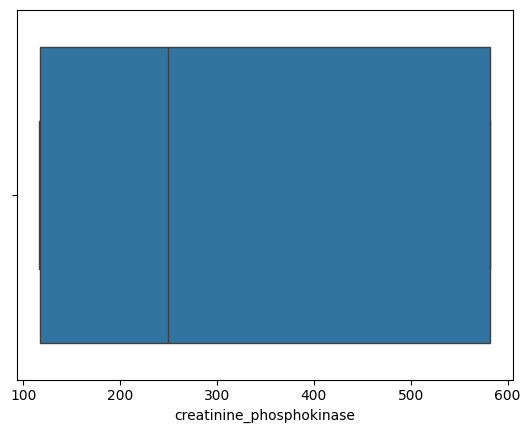

In [23]:
sns.boxplot(x='creatinine_phosphokinase',data=df)

Text(0.5, 1.0, 'boxplot for platelets')

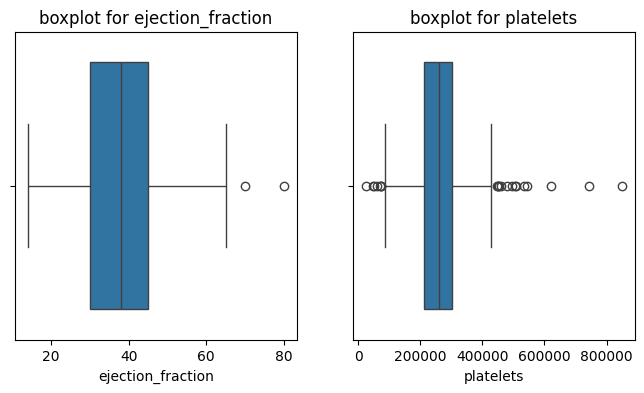

In [24]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
sns.boxplot(data = df,ax=axes[0],x='ejection_fraction')
axes[0].set_title("boxplot for ejection_fraction")
sns.boxplot(data = df,ax=axes[1],x='platelets')
axes[1].set_title("boxplot for platelets")

In [25]:
quant=df['platelets'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)

0.75    303500.0
0.25    212500.0
Name: platelets, dtype: float64
303500.0
212500.0
91000.0
440000.0
76000.0


In [26]:
df['platelets']=np.where(df['platelets']>303500,303500,df['platelets'])
df['platelets']=np.where(df['platelets']<212500,212500,df['platelets'])

<Axes: xlabel='platelets'>

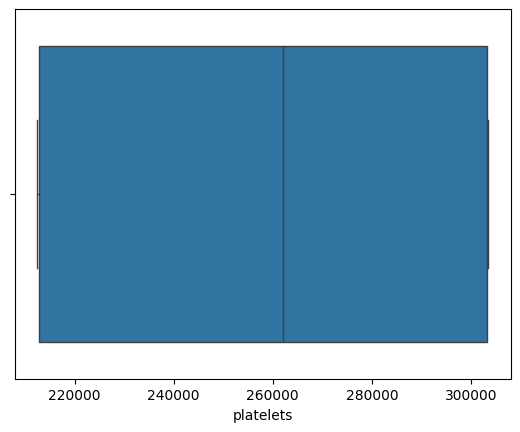

In [27]:
sns.boxplot(x='platelets',data=df)

Text(0.5, 1.0, 'boxplot for serum_sodium ')

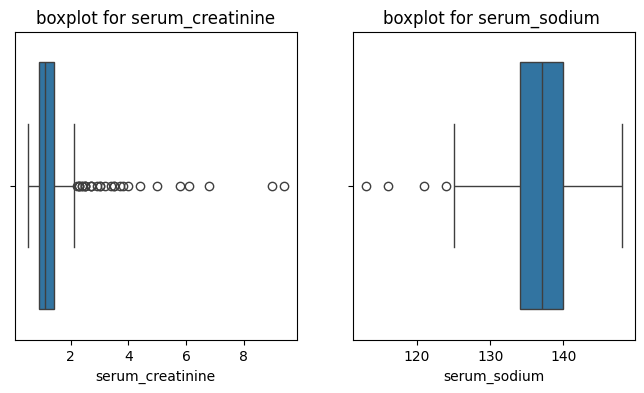

In [28]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
sns.boxplot(data = df,ax=axes[0],x= 'serum_creatinine')
axes[0].set_title("boxplot for serum_creatinine")
sns.boxplot(data = df,ax=axes[1],x= 'serum_sodium')
axes[1].set_title("boxplot for serum_sodium ")

In [29]:
quant=df['serum_creatinine'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)

0.75    1.4
0.25    0.9
Name: serum_creatinine, dtype: float64
1.4
0.9
0.4999999999999999
2.1499999999999995
0.15000000000000024


In [30]:
df['serum_creatinine']=np.where(df['serum_creatinine']>1.4,1.4,df['serum_creatinine'])
df['serum_creatinine']=np.where(df['serum_creatinine']< 0.9,0.9,df['serum_creatinine'])

<Axes: xlabel='serum_creatinine'>

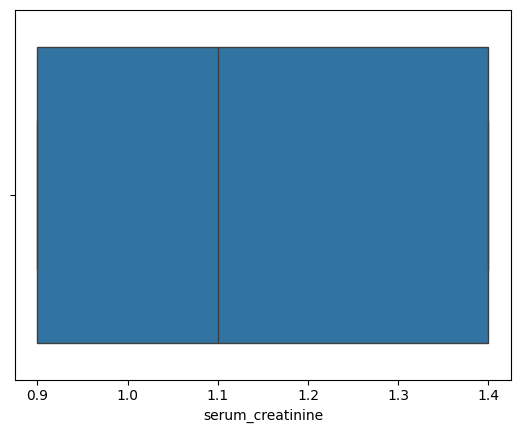

In [31]:
sns.boxplot(x='serum_creatinine',data=df)

In [32]:
df.drop(['platelets', 'sex', 'smoking'],axis=1,inplace=True)

In [33]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,0,582.0,0,20,1,1.4,130,4,1
1,55.0,0,582.0,0,38,0,1.1,136,6,1
2,65.0,0,146.0,0,20,0,1.3,129,7,1
3,50.0,1,116.5,0,20,0,1.4,137,7,1
4,65.0,1,160.0,1,20,0,1.4,116,8,1
...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,116.5,1,38,1,1.1,143,270,0
295,55.0,0,582.0,0,38,0,1.2,139,271,0
296,45.0,0,582.0,1,60,0,0.9,138,278,0
297,45.0,0,582.0,0,38,0,1.4,140,280,0


# **Splitting the variables**

In [34]:
x=df.drop(['DEATH_EVENT'],axis=1)
y=df['DEATH_EVENT']

In [35]:
from sklearn.model_selection import train_test_split,GridSearchCV

# **SMOTE**

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [38]:
x_resampled

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,time
0,75.000000,0,582.000000,0,20,1,1.400000,130,4
1,55.000000,0,582.000000,0,38,0,1.100000,136,6
2,65.000000,0,146.000000,0,20,0,1.300000,129,7
3,50.000000,1,116.500000,0,20,0,1.400000,137,7
4,65.000000,1,160.000000,1,20,0,1.400000,116,8
...,...,...,...,...,...,...,...,...,...
401,45.000000,0,582.000000,0,31,0,1.000000,142,60
402,61.618495,0,582.000000,0,23,0,1.210308,136,208
403,58.732941,0,152.695876,0,26,0,1.273294,133,183
404,74.106478,0,568.537466,0,28,0,1.400000,133,35


In [39]:
y_resampled

0      1
1      1
2      1
3      1
4      1
      ..
401    1
402    1
403    1
404    1
405    1
Name: DEATH_EVENT, Length: 406, dtype: int64

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [41]:
print("\nShapes of the split datasets:")
print("X_train:", x_train.shape)
print("X_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes of the split datasets:
X_train: (284, 9)
X_test: (122, 9)
y_train: (284,)
y_test: (122,)


# **Scaling**

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [44]:
x_train_scaled

array([[ 1.5442827 , -0.73720978,  0.18327539, ...,  0.67499474,
        -0.06572053, -1.13239232],
       [ 2.14669915,  1.356466  ,  1.18752922, ...,  0.67499474,
        -0.53233629,  0.05185146],
       [-1.52235846, -0.73720978, -0.21027157, ...,  0.67499474,
         1.33412675, -0.37293164],
       ...,
       [-1.6140849 , -0.73720978,  1.18752922, ...,  1.19254155,
        -1.46556781,  1.6351339 ],
       [ 1.57595483,  1.356466  , -1.03251062, ...,  1.19254155,
        -0.99895205, -1.3769644 ],
       [ 1.68806695, -0.73720978,  1.18752922, ..., -0.36009887,
         1.80074251, -0.38580385]])

**Logistic Regression**

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
y_pred1=lr.predict(x_train)

In [48]:
print("testing accuracy:",accuracy_score(y_test,y_pred)*100)
print("training accuracy:",accuracy_score(y_train,y_pred1)*100)


testing accuracy: 78.68852459016394
training accuracy: 82.74647887323944


In [49]:
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=8)
rfe.fit(x_train, y_train)
pred=rfe.predict(x_test)
pred

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [50]:
accuracy_score(y_test,pred)
accuracy_score(y_train,rfe.predict(x_train))

0.7992957746478874

**DecisionTree Classifier**

In [51]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dt_pred=dtc.predict(x_test)
dt_pred1=dtc.predict(x_train)

In [52]:
print("testing accuracy:",accuracy_score(y_test,dt_pred)*100)
print("training accuracy:",accuracy_score(y_train,dt_pred1)*100)

testing accuracy: 77.04918032786885
training accuracy: 100.0


**RandomForest**

In [53]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
rf_pred1=rf.predict(x_train)

In [54]:
print("testing accuracy:",accuracy_score(y_test,rf_pred)*100)
print("training accuracy:",accuracy_score(y_train,rf_pred1)*100)

testing accuracy: 89.34426229508196
training accuracy: 100.0


**SVC**

In [55]:
svc=SVC()
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)
svc_pred1=svc.predict(x_train)

In [56]:
print("testing accuracy:",accuracy_score(y_test,svc_pred)*100)
print("training accuracy:",accuracy_score(y_train,svc_pred1)*100)

testing accuracy: 72.95081967213115
training accuracy: 72.88732394366197


**GradientBoostingClassifier**

In [57]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred=gbc.predict(x_test)
gbc_pred1=gbc.predict(x_train)

In [58]:
print("testing accuracy:",accuracy_score(y_test,gbc_pred)*100)
print("training accuracy:",accuracy_score(y_train,gbc_pred1)*100)

testing accuracy: 88.52459016393442
training accuracy: 99.29577464788733


**KNN**

In [59]:
Knn= KNeighborsClassifier()
Knn.fit(x_train,y_train)
knn_pred=Knn.predict(x_test)
knn_pred1=Knn.predict(x_train)

In [60]:
print("testing accuracy:",accuracy_score(y_test,knn_pred)*100)
print("training accuracy:",accuracy_score(y_train,knn_pred1)*100)

testing accuracy: 80.32786885245902
training accuracy: 88.02816901408451


**GridsearchCv**

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris




# Define the parameter grid
param_grid = {
    "penalty": ["l1", "l2", "elasticnet", None],
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear", "saga"],  # Note: not all solvers support all penalties
    "l1_ratio": [0, 0.5, 1]  # Only used if penalty is 'elasticnet'
}



In [62]:
# Create the GridSearchCV object
logreg_cv = GridSearchCV(
    estimator=LogisticRegression(max_iter=10000),  # Increased max_iter for convergence
    param_grid=param_grid,
    n_jobs=-1,
    cv=5,
    scoring='accuracy',
    verbose=2
)


In [63]:

# Fit the model to the training data
logreg_cv.fit(x_train, y_train)

# Get the best parameters
best_params = logreg_cv.best_params_
print(f"Best parameters: {best_params}")

# Train a new LogisticRegression model with the best parameters
best_logreg = LogisticRegression(**best_params, max_iter=10000)
best_logreg.fit(x_train, y_train)

# Evaluate the model
accuracy = best_logreg.score(x_test, y_test)
print(f"Test set accuracy: {accuracy}")

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters: {'C': 1, 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'liblinear'}
Test set accuracy: 0.7786885245901639


In [64]:
accuracy1 = best_logreg.score(x_train, y_train)
print(f"Training set accuracy: {accuracy}")

Training set accuracy: 0.7786885245901639


Text(0.5, 1.0, 'ConfusionMatrix.')

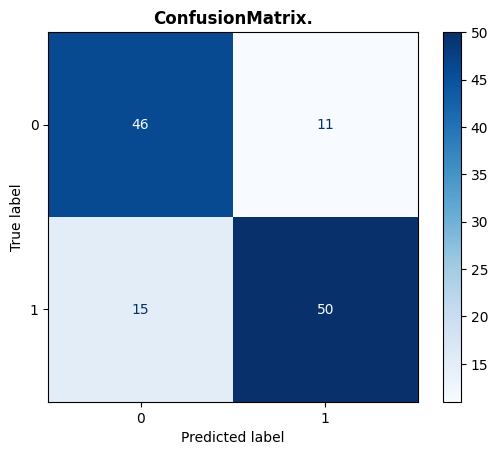

In [65]:
cm_test = confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [0, 1])
matrix.plot(cmap="Blues")
plt.title("ConfusionMatrix.", weight="bold")

In [66]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,time
0,75.0,0,582.0,0,20,1,1.4,130,4
1,55.0,0,582.0,0,38,0,1.1,136,6
2,65.0,0,146.0,0,20,0,1.3,129,7
3,50.0,1,116.5,0,20,0,1.4,137,7
4,65.0,1,160.0,1,20,0,1.4,116,8
...,...,...,...,...,...,...,...,...,...
294,62.0,0,116.5,1,38,1,1.1,143,270
295,55.0,0,582.0,0,38,0,1.2,139,271
296,45.0,0,582.0,1,60,0,0.9,138,278
297,45.0,0,582.0,0,38,0,1.4,140,280


In [70]:
x.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'serum_creatinine',
       'serum_sodium', 'time'],
      dtype='object')

In [67]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

# **Prediction**

In [68]:
prediction=lr.predict([[45.0,0,582.0,1,60,0,0.9,138,278]])
prediction

array([0])

In [69]:
import pickle
pickle.dump(lr,open("logreg.pkl","wb"))